In [95]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

In [27]:
df= pd.read_csv('ready_to_model.csv')

In [28]:
df.head()

,job_title,location,class,job_type,description,senior_role,pay_type,salary,job_role,pay_rate
0,data scientist | smart cities,Sydney,Science & Healthcare,Contract/Temp,\r\r\r\r\r\r\r\r\r\nTalenza has been engaged b...,False,daily,262500.0,DS,high
1,data scientist l machine learning engineer l $...,Sydney,Information & Communication Technology,Full Time,Great team environment/ office space Perman...,False,annual,154999.5,DS,high
2,data scientist,Melbourne,Information & Communication Technology,Full Time,Data Scientist | Melbourne CBD | Permanent\r\r...,False,annual,120000.0,DS,moderate
3,lead data scientist | python | machine learning,Sydney,Science & Healthcare,Contract/Temp,\r\r\r\r\r\r\r\r\r\nTalenza has been engaged b...,True,daily,356250.0,SeniorDS,high
4,data scientist,Sydney,Information & Communication Technology,Contract/Temp,\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\n\r\r\r...,False,annual,195227.0,DS,high


In [4]:
df.drop(['description', 'senior_role','job_title'], axis=1, inplace=True)

### Plots

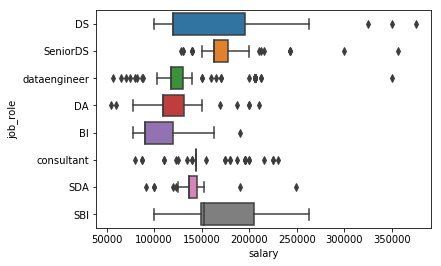

In [5]:
#plt.boxplot('salary','job_role', data=df)
plt.plot(figsize=(12,10))
sns.boxplot('salary','job_role', data=df)

Text(0.5, 1.0, 'Salary range for each distinct job title and work type')

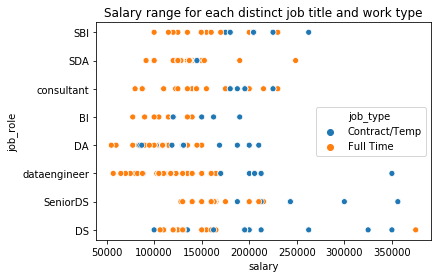

In [6]:
ax= sns.scatterplot('salary','job_role', hue='job_type', data=df)
plt.legend(loc='center right')
plt.title('Salary range for each distinct job title and work type')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 7 columns):
location    669 non-null object
class       669 non-null object
job_type    669 non-null object
pay_type    669 non-null object
salary      669 non-null float64
job_role    669 non-null object
pay_rate    669 non-null object
dtypes: float64(1), object(6)
memory usage: 36.7+ KB


Text(0, 0.5, 'Pay range')

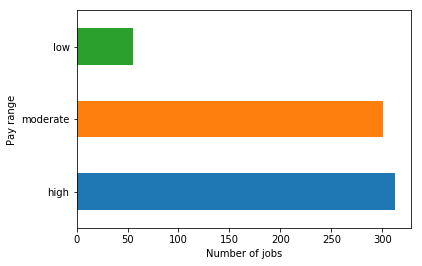

In [48]:
df.pay_rate.value_counts().plot(kind='barh')
plt.xlabel('Number of jobs')
plt.ylabel('Pay range')

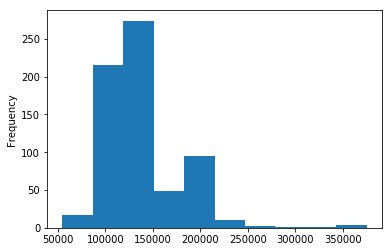

In [8]:
df.salary.plot(kind='hist')

In [9]:
df['salary'] = np.log(df['salary'])

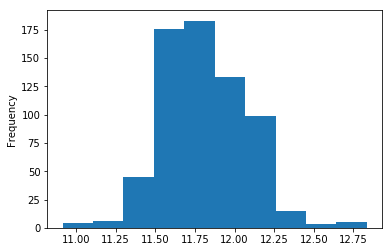

In [10]:
df.salary.plot(kind='hist')

### Get dummies

In [12]:
df= pd.get_dummies(df, columns=['location','class','job_type','pay_type','job_role'], drop_first=True)

In [13]:
df.head(2)

,salary,pay_rate,location_Adelaide,location_Brisbane,location_Gosford & Central Coast,location_Hobart,location_Melbourne,location_Perth,location_South West Coast VIC,location_Sydney,...,job_type_Full Time,pay_type_daily,pay_type_hourly,job_role_DA,job_role_DS,job_role_SBI,job_role_SDA,job_role_SeniorDS,job_role_consultant,job_role_dataengineer
0,12.478006,high,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1,11.951177,high,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [14]:
df.shape

(669, 24)

### Define X and Y

In [15]:
X = df.drop(['salary', 'pay_rate'], axis=1)

In [16]:
X.shape

(669, 22)

In [17]:
y= df.salary.values
y.shape

(669,)

In [18]:
ss= StandardScaler()

Xs = ss.fit_transform(X)

C:\Users\anita\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anita\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Train test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size= 0.25, random_state=42)

### 1.) Linear Regression model

In [20]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
prediction = lr.predict(X_test)

In [22]:
score = r2_score(y_test, prediction)
error = mean_squared_error(y_test, prediction)
print('Mulitple Linear regression model score is:',score),
print('MLR MSE is:', error)

Mulitple Linear regression model score is: 0.6311625193807437
MLR MSE is: 0.02236237158036956


### 2.) Ridge
#### finding optimal alpha value

In [26]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print(optimal_ridge.alpha_)

2.8330961018393244


In [27]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge.fit(X_train, y_train)
#ridge_scores = cross_val_score(ridge, Xs, y, cv=10)
#print(ridge_scores)
#print(np.mean(ridge_scores))

Ridge(alpha=2.8330961018393244, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [28]:
 pred1 =ridge.predict(X_test)

In [29]:
print('Ridge R-squared score is:',r2_score(y_test, pred1))
print('Ridge RMSE score is:',mean_squared_error(y_test, pred1))

0.6321560834717895
0.022302132449152273


### 3.) Lasso
Starting with finding optimal alpha for lasso regularisation

In [30]:
optimal_lasso = LassoCV(n_alphas=500, cv=10)
optimal_lasso.fit(X_train, y_train)

print(optimal_lasso.alpha_)

0.000391360173595815


In [31]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(X_train, y_train)

Lasso(alpha=0.000391360173595815, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
pred_lasso = lasso.predict(X_test)

In [57]:
print('Lasso R-sqaured score is:',r2_score(y_test, pred_lasso))
print('Lasso RMSE is:', mean_squared_error(y_test, pred_lasso))

0.6339710486562372
0.022192092314966588


###  Top coefficients

In [33]:
coefs = pd.DataFrame({'variable':X.columns,
                      'coef': lasso.coef_})

In [34]:
coefs.sort_values(by = 'coef', inplace=True, ascending=False)
coefs.head(10)

,variable,coef
19,job_role_SeniorDS,0.136322
20,job_role_consultant,0.125163
17,job_role_SBI,0.121602
16,job_role_DS,0.099744
21,job_role_dataengineer,0.096778
18,job_role_SDA,0.089724
13,pay_type_daily,0.045564
15,job_role_DA,0.015178
3,location_Hobart,0.001560
6,location_South West Coast VIC,0.000992


### Plots

C:\Users\anita\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


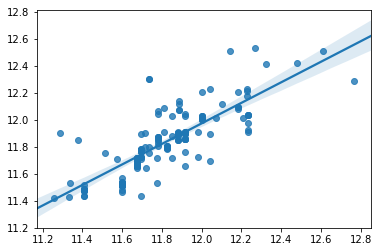

In [35]:
sns.regplot(y_test, pred_lasso, data=df)

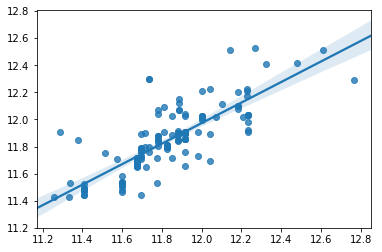

In [36]:
sns.regplot(y_test, pred1, data=df)

### Classification model to predict salary class

In [49]:
df.head()

,job_title,location,class,job_type,description,senior_role,pay_type,salary,job_role,pay_rate
0,data scientist | smart cities,Sydney,Science & Healthcare,Contract/Temp,\r\r\r\r\r\r\r\r\r\nTalenza has been engaged b...,False,daily,262500.0,DS,high
1,data scientist l machine learning engineer l $...,Sydney,Information & Communication Technology,Full Time,Great team environment/ office space Perman...,False,annual,154999.5,DS,high
2,data scientist,Melbourne,Information & Communication Technology,Full Time,Data Scientist | Melbourne CBD | Permanent\r\r...,False,annual,120000.0,DS,moderate
3,lead data scientist | python | machine learning,Sydney,Science & Healthcare,Contract/Temp,\r\r\r\r\r\r\r\r\r\nTalenza has been engaged b...,True,daily,356250.0,SeniorDS,high
4,data scientist,Sydney,Information & Communication Technology,Contract/Temp,\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\n\r\r\r...,False,annual,195227.0,DS,high


In [50]:
df= pd.get_dummies(df, columns=['location','class','job_type','pay_type','job_role'], drop_first=True)

In [51]:
df.head(2)

,job_title,description,senior_role,salary,pay_rate,location_Adelaide,location_Brisbane,location_Gosford & Central Coast,location_Hobart,location_Melbourne,...,job_type_Full Time,pay_type_daily,pay_type_hourly,job_role_DA,job_role_DS,job_role_SBI,job_role_SDA,job_role_SeniorDS,job_role_consultant,job_role_dataengineer
0,data scientist | smart cities,\r\r\r\r\r\r\r\r\r\nTalenza has been engaged b...,False,262500.0,high,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,data scientist l machine learning engineer l $...,Great team environment/ office space Perman...,False,154999.5,high,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [56]:
X= df.drop(['salary','pay_rate','job_title','description','senior_role'], axis=1)

In [57]:
y= df.pay_rate

In [58]:
#baseline
y.value_counts()/sum(y.value_counts())

high        0.467862
moderate    0.449925
low         0.082212
Name: pay_rate, dtype: float64

### K nearest neighbors

In [59]:
from sklearn.neighbors import KNeighborsClassifier
ss = StandardScaler()
Xs = ss.fit_transform(X)

C:\Users\anita\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anita\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [60]:
knn = KNeighborsClassifier(n_neighbors=3)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=42)

In [72]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [63]:
y_pred_class = knn.predict(X_test)

In [64]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.8452380952380952


In [65]:
knn.score(X_test, y_test)

0.8452380952380952

In [66]:
knn.score(X_train, y_train)

0.874251497005988

In [97]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

        high       0.85      0.90      0.88        83
         low       0.75      0.43      0.55        14
    moderate       0.85      0.86      0.85        71

   micro avg       0.85      0.85      0.85       168
   macro avg       0.82      0.73      0.76       168
weighted avg       0.84      0.85      0.84       168



### Decision tree classifier

In [73]:
#rf = RandomForest(n_estimators=1000, max_depth=None, max_features='auto')
Xtrain, Xtest, ytrain, ytest = train_test_split(Xs, y, test_size=0.33, random_state=42)

dt = DecisionTreeClassifier(max_depth=None, max_features='auto')

In [74]:
model = dt.fit(Xtrain, ytrain)

In [75]:
ypred = model.predict(Xtest)

In [76]:
model.feature_importances_

array([3.15266641e-03, 2.08976764e-02, 0.00000000e+00, 3.56434392e-05,
       2.44383156e-02, 1.05504119e-02, 0.00000000e+00, 1.20053852e-02,
       0.00000000e+00, 1.42115218e-02, 1.29192630e-02, 1.66657383e-02,
       1.49963721e-01, 3.93380803e-02, 1.47202330e-02, 1.41236620e-01,
       1.09190806e-01, 3.05364945e-02, 6.80929593e-02, 4.53561787e-02,
       1.09235426e-01, 1.77452859e-01])

In [77]:
print(('dtc acc:', model.score(Xtest, ytest)))

('dtc acc:', 0.8461538461538461)


In [78]:
print('Accuracy is:',accuracy_score(ytest, ypred)*100)

Accuracy is: 84.61538461538461


In [79]:
DTF = pd.DataFrame({
        'feature':X.columns,
        'importance':model.feature_importances_
    })

DTF.sort_values('importance', ascending=False, inplace=True)
DTF.head()

,feature,importance
21,job_role_dataengineer,0.177453
12,job_type_Full Time,0.149964
15,job_role_DA,0.141237
20,job_role_consultant,0.109235
16,job_role_DS,0.109191


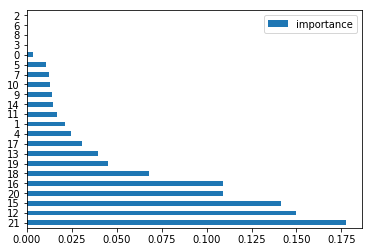

In [82]:
DTF.plot(kind='barh')

### Random forest classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf =RandomForestClassifier()

In [84]:
rf.fit(Xtrain, ytrain)

C:\Users\anita\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [85]:
pred = rf.predict(Xtest)

In [86]:
print('Accuracy score is:', rf.score(Xtest, ytest))

Accuracy score is: 0.8642533936651584


In [87]:
metrics.accuracy_score(ytest, pred)

0.8642533936651584

In [88]:
features = pd.DataFrame({
        'feature':X.columns,
        'importance':rf.feature_importances_
    })

features.sort_values('importance', ascending=False, inplace=True)
features.head()

,feature,importance
12,job_type_Full Time,0.142905
21,job_role_dataengineer,0.134235
15,job_role_DA,0.112752
20,job_role_consultant,0.102407
17,job_role_SBI,0.094635


### Summary